импорт всех нужных библиотек

In [1]:
import torch
import sys
import os
from model import Trainer,QuantumModel

import matplotlib.pyplot as plt
#путь к корню директории
#from setting import BASE_DIR
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer
from model_history import ModelHistory

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.vec_to_vec(
    window_size,
    num_features,
    downsample_step,
    target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = PD.PDtrain_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
#инициализация модели
model = QuantumModel( 
    in_features = X_train.shape[1], # window_size*num_features - 1
    out_features = target_window_size,
    head = 16,
    hid_q=16,
    hid_l=128,
    dropout_rate=0.3,
    device = device)

trainer = Trainer(
    model=model,
    learning_rate=0.001,
    inf_per_epoch = 5,
    device= device
)

In [4]:
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=32,
    epochs=50,
    loss_tube=5,
)

Epoch 5
Main: 0.493571, MAPE: 0.245091
Test - MAPE: 0.161565, Tube: 0.201832
Epoch 10
Main: 0.409633, MAPE: 0.194018
Test - MAPE: 0.106156, Tube: 0.254652
Epoch 15
Main: 0.326964, MAPE: 0.143980
Test - MAPE: 0.110834, Tube: 0.258517
Epoch 20
Main: 0.321161, MAPE: 0.139633
Test - MAPE: 0.110336, Tube: 0.264243
Epoch 25
Main: 0.313898, MAPE: 0.135426
Test - MAPE: 0.098964, Tube: 0.276410
Epoch 30
Main: 0.316249, MAPE: 0.135489
Test - MAPE: 0.099622, Tube: 0.284140
Epoch 35
Main: 0.309537, MAPE: 0.133560
Test - MAPE: 0.101814, Tube: 0.266104
Epoch 40
Main: 0.312814, MAPE: 0.134277
Test - MAPE: 0.100401, Tube: 0.273690
Epoch 45
Main: 0.315580, MAPE: 0.135078
Test - MAPE: 0.100747, Tube: 0.272402
Epoch 50
Main: 0.314007, MAPE: 0.134445
Test - MAPE: 0.100764, Tube: 0.272116


In [5]:
MH = ModelHistory(history)
MH.save_history_json(filename = BASE_DIR+'\loss_history/all_loss.json',model_name = 'EARLY_QUANT')

In [6]:
LV = LossVisualizer(history)

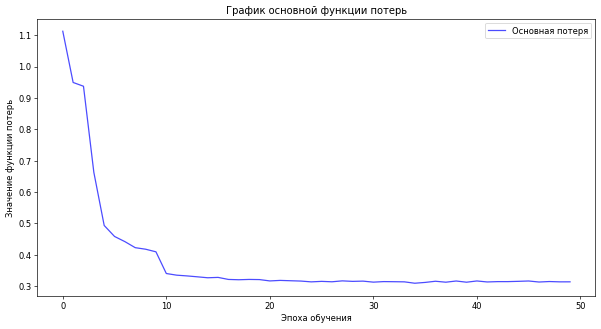

In [7]:
LV.show_training_loss()

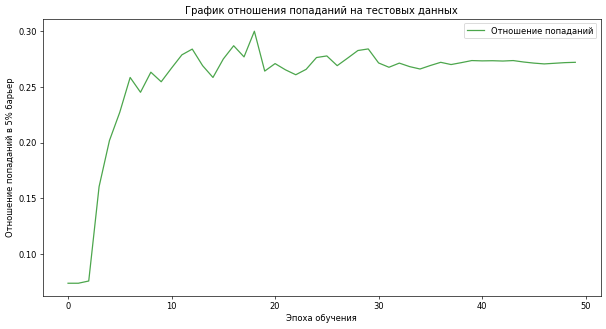

In [8]:
LV.show_test_tube()

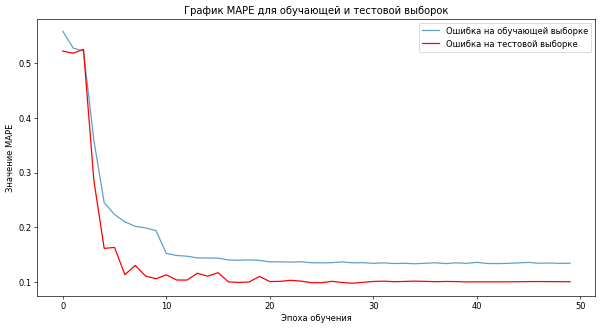

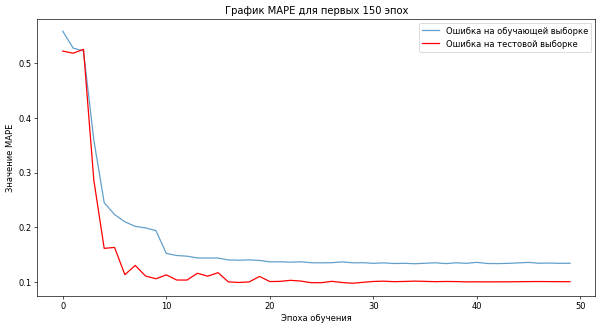

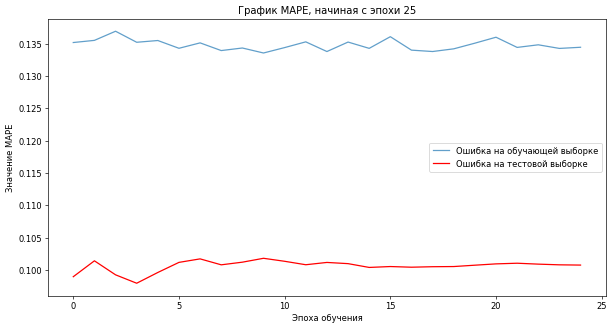

In [9]:
LV.show_mape(start_epoch = 25)

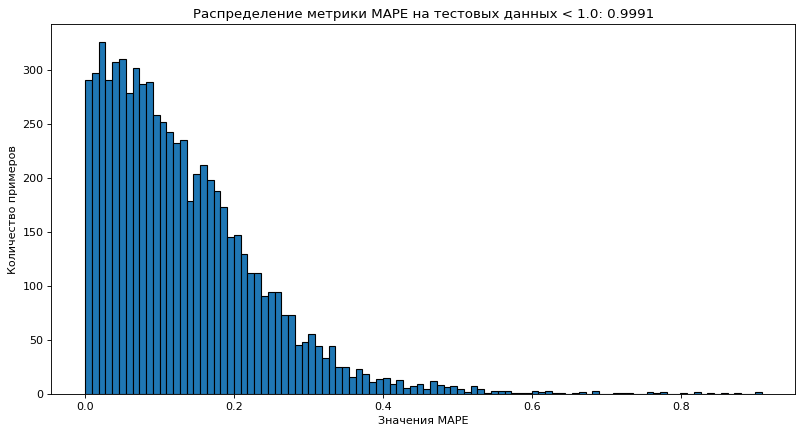

Процент значений MAPE < 1.0: 0.9991


In [13]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 100)

Количество записей: 5334


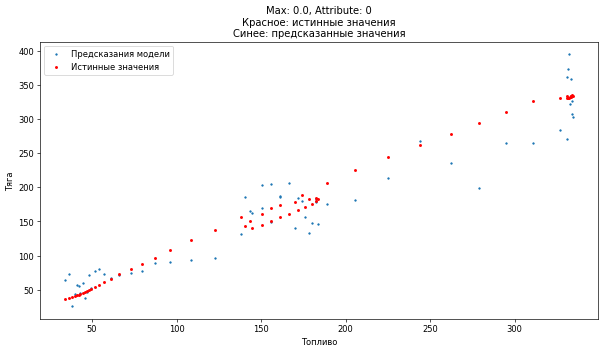

Количество записей: 5334


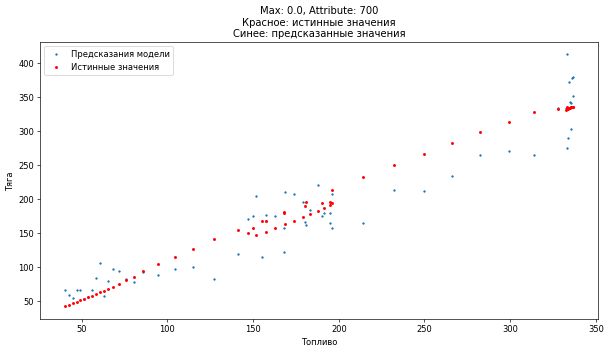

Количество записей: 5334


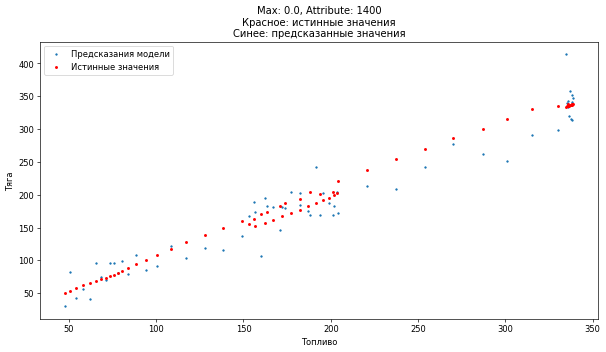

Количество записей: 5334


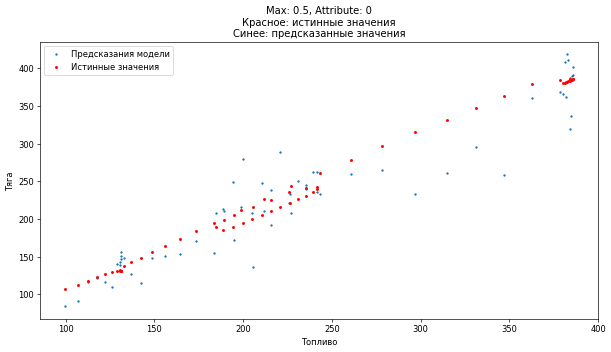

Количество записей: 5334


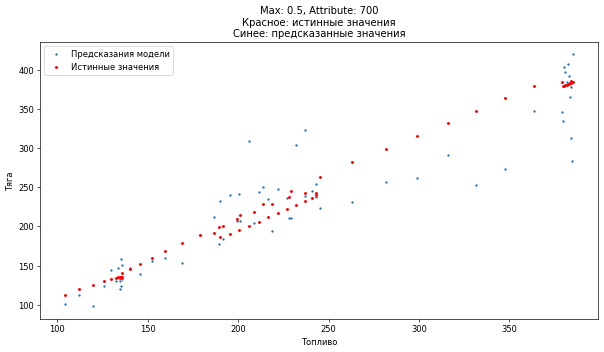

Количество записей: 5334


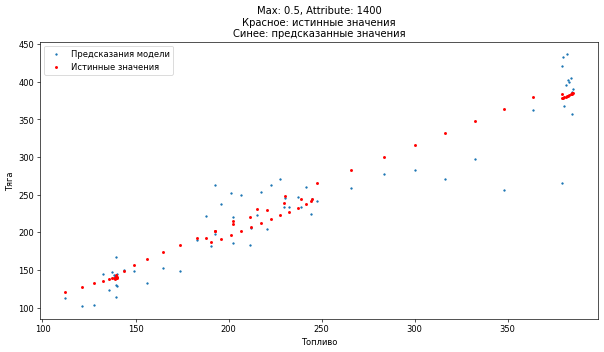

Количество записей: 5334


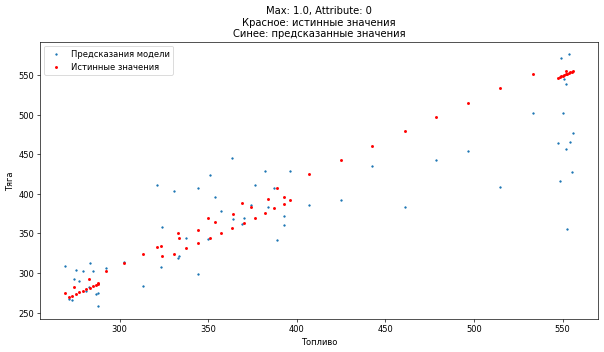

Количество записей: 5334


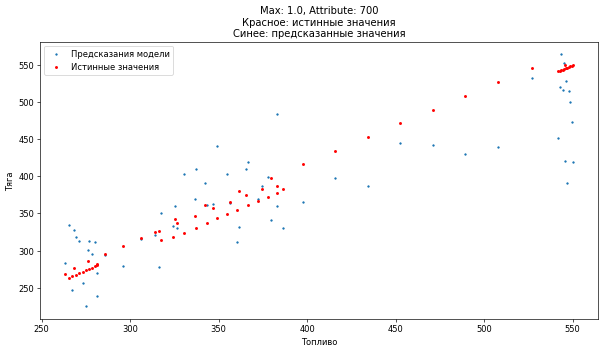

Количество записей: 5334


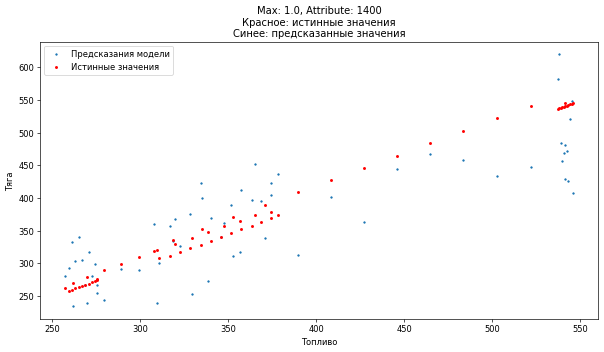

In [11]:
LV.show_predictions(model,df,pd_params,keras = False,device=device)